## IMPORTING, SET UP AND PRE-PROCESSING 
### Required across all labs 

In [1]:

# One lab one umap 
# End goal of the umap is to have 4 distinct clusters for the 4 phenotypes. 
# In one notebook, import all 4 phenos and find the mean of 24hrs and plot the umaps 
# only for 24 hours post sepsis 


# 20K means ~ 20K patients ==> 4 phenos ==> 80K points per umap 
# ^^ plot for this 
# should separate into 4 clusters 

In [2]:
#Import packages 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap 
%matplotlib inline

In [3]:
%cd /Users/anirudh/Documents/KamalLabs

/Users/anirudh/Documents/KamalLabs


In [4]:
!ls 


Certificates                            Sepsis_Cohort_GITRepo
Code                                    mimic-iv-2.2
Em_Pheno_MAPS                           pSQL.self_code
M3                                      sepsis24hrs_Pheno0.csv
M3Tables_Raw                            sepsis24hrs_Pheno0.xlsx
M4Data                                  sepsis24hrs_Pheno1.csv
MODS-Phenotypes_git                     sepsis24hrs_Pheno2.csv
Presentations & Notes                   sepsis24hrs_Pheno3.csv
Screenshot 2023-07-23 at 3.54.09 PM.png


In [3]:
P0 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno0.csv")
P1 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno1.csv")
P2 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno2.csv")
P3 = pd.read_csv("/Users/anirudh/Documents/KamalLabs/sepsis24hrs_Pheno3.csv")


In [4]:
check = P0.head
check 
cols = P0.columns  
cols 


Index(['Unnamed: 0', 'csn', 'phenotype_0', 'charttime', 'pt_id',
       'total_hosp_days', 'discharge_to', 'pulse', 'temperature', 'sbp_cuff',
       'dbp_cuff', 'map_cuff', 'unassisted_resp_rate', 'end_tidal_co2', 'spo2',
       'fio2', 'base_excess', 'bicarb_(hco3)',
       'partial_pressure_of_carbon_dioxide_(paco2)', 'ph',
       'saturation_of_oxygen_(sao2)', 'chloride', 'creatinine',
       'bilirubin_direct', 'glucose', 'lactate_dehydrogenase', 'magnesium',
       'SIRS_resp', 'SIRS_cardio', 'SIRS_temp', 'SIRS_wbc', 'hourly_total',
       'partial_prothrombin_time_(ptt)', 'platelets', 'white_blood_cell_count',
       'fibrinogen', 'bilirubin_total', 'troponin', 'potassium', 'hemoglobin',
       'hematocrit', 'phosphorus', 'first_sep3_time', '_merge'],
      dtype='object')

In [6]:
# drop unnnamed: 0 col. Serves no purpose 

P0 = P0.drop(columns = ['Unnamed: 0'])
P1 = P1.drop(columns = ['Unnamed: 0'])
P2 = P2.drop(columns = ['Unnamed: 0'])
P3 = P3.drop(columns = ['Unnamed: 0'])

# display(P0, P1, P2, P3)

KeyError: "['Unnamed: 0'] not found in axis"

In [7]:
req_cols = ['csn', "bilirubin_total", 'troponin', 'platelets', 'pulse', 'map_cuff']
P0 = P0[req_cols]
P1 = P1[req_cols]
P2 = P2[req_cols]
P3 = P3[req_cols]

P = [P0, P1, P2, P3]
for i in P: 
    print (i.shape)




(1145387, 6)
(654540, 6)
(573992, 6)
(969021, 6)


In [8]:
P0.fillna(0, inplace=True)
P1.fillna(0, inplace=True)
P2.fillna(0, inplace=True)
P3.fillna(0, inplace=True)

#p0_colaped = P0.groupby('csn').mean(numeric_only=True)
P3.head()


/var/folders/m1/b8h0__9519gdz_f9pqrq323h0000gn/T/ipykernel_72271/2316777690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P0.fillna(0, inplace=True)


,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11057156295,0.5,0.0,173.0,105.0,0.0
1,11057156295,0.5,0.0,173.0,105.0,0.0
2,11057156295,0.5,0.0,173.0,108.0,0.0
3,11057156295,0.5,0.0,173.0,104.0,0.0
4,11057156295,0.5,0.0,173.0,100.0,0.0


In [9]:
P = [P0, P1, P2, P3]
p0_mean = P0.groupby("csn").mean().reset_index()
p1_mean = P1.groupby("csn").mean().reset_index()
p2_mean = P2.groupby("csn").mean().reset_index()
p3_mean = P3.groupby("csn").mean().reset_index()

p_mean =[p0_mean, p1_mean, p2_mean, p3_mean]


In [10]:
for i in p_mean: 
    print(i.shape)

(48150, 6)
(27504, 6)
(24132, 6)
(40735, 6)


In [11]:
p3_mean.head()

,csn,bilirubin_total,troponin,platelets,pulse,map_cuff
0,11679027,0.245833,0.00,396.250000,82.958333,75.750000
1,12056175,33.387500,0.00,229.333333,114.916667,58.708333
2,12109048,0.400000,0.04,214.375000,79.416667,67.500000
3,14580061,0.325000,0.03,225.000000,73.583333,72.458333
4,15226129,0.345833,0.00,239.375000,86.166667,80.916667


## UMAP for Bilirubin 

In [12]:
display(p0_mean.columns)

Index(['csn', 'bilirubin_total', 'troponin', 'platelets', 'pulse', 'map_cuff'], dtype='object')

In [13]:
p0_bil = p0_mean.iloc[:, 1]
p1_bil = p1_mean.iloc[:, 1]
p2_bil = p2_mean.iloc[:, 1]
p3_bil = p3_mean.iloc[:, 1]

p_bil = [p0_bil, p1_bil, p2_bil, p3_bil]
for i in p_bil: 
    print(i.shape)

(48150,)
(27504,)
(24132,)
(40735,)


In [14]:

import pandas as pd

#col_add = [p0, p1, p2, p3].astype(float)
col_add = ['P0', 'P1', 'P2', 'P3']
counts = [48150, 27504, 24132, 40735]

data = {'Pheno': [], 'Count': []}

for col, count in zip(col_add, counts):
    data['Pheno'].extend([col] * count)
    data['Count'].extend([count] * count)

pheno_df = pd.DataFrame(data)
pheno_df['Count'] = pheno_df['Count'].astype(float)



In [15]:
# Define a mapping from string values to integers
mapping = {'P0': 0, 'P1': 1, 'P2': 2, 'P3': 3}

# Apply the mapping to the 'Pheno' column
pheno_df['Pheno'] = pheno_df['Pheno'].map(mapping)


In [16]:
#pheno[48151]
display(pheno_df)
display(pheno_df.shape)
pheno_df = pheno_df['Pheno']
display(pheno_df)



,Pheno,Count
0,0,48150.0
1,0,48150.0
2,0,48150.0
3,0,48150.0
4,0,48150.0
...,...,...
140516,3,40735.0
140517,3,40735.0
140518,3,40735.0
140519,3,40735.0


(140521, 2)

0         0
1         0
2         0
3         0
4         0
         ..
140516    3
140517    3
140518    3
140519    3
140520    3
Name: Pheno, Length: 140521, dtype: int64

In [17]:
display(p0_bil.shape)
p0_bil

(48150,)

0         0.245833
1        33.387500
2         0.400000
3         0.866667
4         0.325000
           ...    
48145     0.316667
48146     0.625000
48147     0.479167
48148     0.687500
48149     0.716667
Name: bilirubin_total, Length: 48150, dtype: float64

In [18]:
combined_bil = pd.concat(p_bil, axis=0)
combined_bil.shape

(140521,)

In [19]:
combined_bilAXIS1 = pd.concat(p_bil, axis=1)
display(combined_bilAXIS1)


,bilirubin_total,bilirubin_total,bilirubin_total,bilirubin_total
0,0.245833,0.245833,0.245833,0.245833
1,33.387500,33.387500,33.387500,33.387500
2,0.400000,0.262500,0.866667,0.400000
3,0.866667,0.437500,0.437500,0.325000
4,0.325000,0.600000,1.200000,0.345833
...,...,...,...,...
48145,0.316667,NaN,NaN,NaN
48146,0.625000,NaN,NaN,NaN
48147,0.479167,NaN,NaN,NaN
48148,0.687500,NaN,NaN,NaN


In [20]:
display(combined_bil.head())
display(combined_bil.shape)
display(pheno_df.head())
display(pheno_df.shape)

0     0.245833
1    33.387500
2     0.400000
3     0.866667
4     0.325000
Name: bilirubin_total, dtype: float64

(140521,)

0    0
1    0
2    0
3    0
4    0
Name: Pheno, dtype: int64

(140521,)

In [374]:
# # Check for duplicate values in combined_bil
# duplicates_bil = combined_bil[combined_bil.duplicated()]
# print("Duplicate values in combined_bil:", duplicates_bil)

# # Check for duplicate values in pheno
# duplicates_pheno = pheno[pheno.duplicated()]
# print("Duplicate values in pheno:", duplicates_pheno)


Duplicate values in combined_bil: 14       0.500000
26       0.500000
29       0.400000
31       0.000000
32       0.000000
           ...   
40730    1.000000
40731    0.625000
40732    0.479167
40733    0.687500
40734    0.716667
Name: bilirubin_total, Length: 136961, dtype: float64
Duplicate values in pheno: 1         P0
2         P0
3         P0
4         P0
5         P0
          ..
140516    P3
140517    P3
140518    P3
140519    P3
140520    P3
Name: 0, Length: 140517, dtype: object


In [21]:
combined_bil.reset_index(drop=True, inplace=True)
pheno_df.reset_index(drop=True, inplace=True)

combined_df = pd.concat([combined_bil, pheno_df], axis=1)


combined_df.head()


,bilirubin_total,Pheno
0,0.245833,0
1,33.387500,0
2,0.400000,0
3,0.866667,0
4,0.325000,0


In [23]:
display(combined_df.bilirubin_total.value_counts())
display(combined_df.Pheno.value_counts())

bilirubin_total
0.000000     36741
0.400000      6130
0.500000      5674
0.300000      4961
0.600000      4661
             ...  
15.633333        1
7.200000         1
0.863636         1
12.716667        1
0.675000         1
Name: count, Length: 3560, dtype: int64

Pheno
0    48150
3    40735
1    27504
2    24132
Name: count, dtype: int64

In [44]:
display(combined_df.shape)
#combined_df.columns.values[1] = 'P'
combined_df.columns

(140521, 2)

Index(['bilirubin_total', 'Pheno'], dtype='object')

In [82]:
combined_df.head()
display(combined_df.tail())

,bilirubin_total,Pheno
140516,1.000000,3
140517,0.625000,3
140518,0.479167,3
140519,0.687500,3
140520,0.716667,3


In [46]:
print(combined_df.columns)

Index(['bilirubin_total', 'Pheno'], dtype='object')


/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


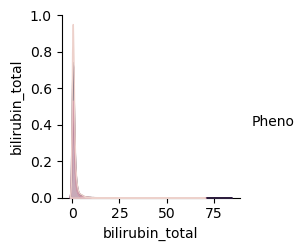

In [47]:
# combined_df = combined_df.T 
# display(combined_df.shape)
sns.pairplot(combined_df, hue='Pheno')


In [473]:
# from sklearn.preprocessing import StandardScaler

# # Select only the numeric columns for scaling
# numeric_cols = combined_df.select_dtypes(include=['number'])

# # Standardize the numeric columns
# scaled_numeric_cols = StandardScaler().fit_transform(numeric_cols)

# # Create a DataFrame with the scaled data
# scaled_df = pd.DataFrame(data=scaled_numeric_cols)


# # Now, scaled_df contains the standardized numeric columns, and you can work with it.


In [51]:
#scaled_dfCombined = StandardScaler().fit_transform(combined_df)
#scaled_df = pd.concat([scaled_df, combined_df['Pheno']], axis=1)


In [62]:
combined_df.head()

,bilirubin_total,Pheno
0,0.245833,0
1,33.387500,0
2,0.400000,0
3,0.866667,0
4,0.325000,0


In [52]:
#scaled_df['Pheno'] = df['Pheno'].astype(float)


In [83]:
umap_reducer = umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.99, random_state=42)
umap_result = umap_reducer.fit_transform(combined_df)

/Users/anirudh/anaconda3/envs/umap_env/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [84]:
print(umap_result)
print(len(umap_result))

[[  7.3475537  -4.67374  ]
 [  6.788004   10.086516 ]
 [-23.098946   -0.1391754]
 ...
 [ 23.1401     -9.161673 ]
 [ 21.838787    4.1497707]
 [ 19.154762    4.220423 ]]
140521


In [85]:
display(umap_result[:, 0])
display(umap_result[:, 1])

array([  7.3475537,   6.788004 , -23.098946 , ...,  23.1401   ,
        21.838787 ,  19.154762 ], dtype=float32)

array([-4.67374  , 10.086516 , -0.1391754, ..., -9.161673 ,  4.1497707,
        4.220423 ], dtype=float32)

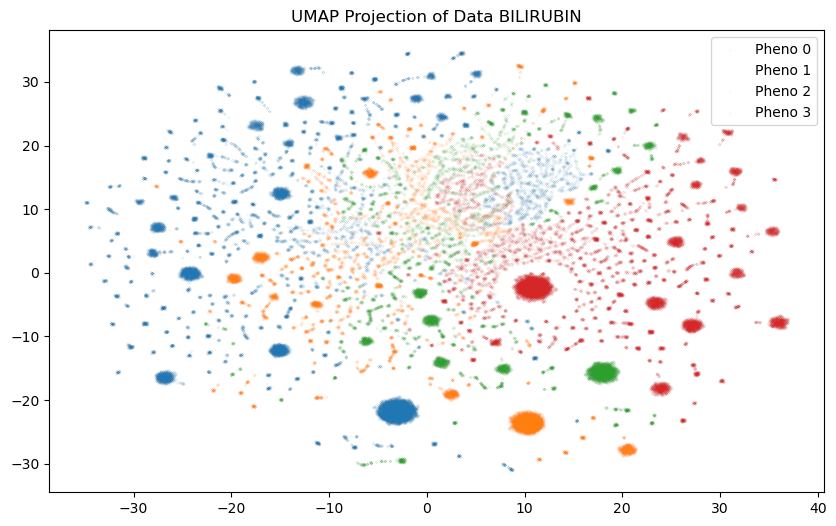

In [87]:
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(
        umap_result[mask, 0],
        umap_result[mask, 1],
        label=f'Pheno {pheno_val}',
        c=[colors(pheno_val)],
        s=0.001 # Adjust the size parameter (e.g., s=10)
    )

plt.title('UMAP Projection of Data BILIRUBIN')
plt.legend()
plt.show()


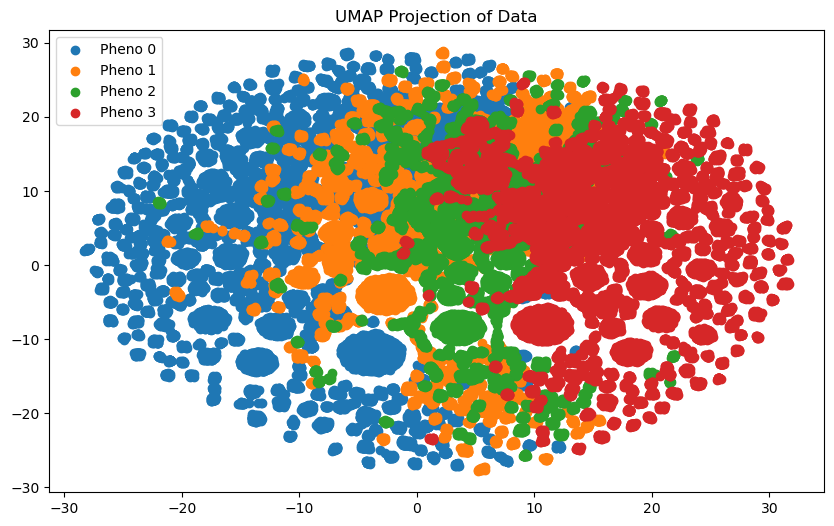

In [74]:
import matplotlib.cm as cm

# Define a color map with 4 distinct colors
colors = cm.tab10  # You can choose other color maps too

# Create a scatter plot with distinct colors for each Pheno category
plt.figure(figsize=(10, 6))
for pheno_val in range(4):  # Assuming you have 4 Pheno categories
    mask = combined_df['Pheno'] == pheno_val
    plt.scatter(umap_result[mask, 0], umap_result[mask, 1], label=f'Pheno {pheno_val}', c=[colors(pheno_val)])

plt.title('UMAP Projection of Data')
plt.legend()
plt.show()
